In [36]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib_venn import venn2
import seaborn as sns

import matplotlib
font = {'family' : 'Arial', 'size'   : 12}
matplotlib.rc('font', **font)

In [37]:
import sys
sys.path.append('../bgc_detection/evaluation')
sys.path.append('../bgc_detection/candidates')

from candidate_coverage import get_coverage, plot_coverage_hist, plot_coverage_boxplot
from confusion_matrix import confusion_matrix, get_threshold
from evaluation_plots import plot_roc_curve
from candidate_regions import candidate_regions
from threshold_candidates import threshold_candidates

# Labelled contig BGC candidates

In [38]:
import importlib
import candidate_regions
importlib.reload(candidate_regions)
from candidate_regions import candidate_regions

In [39]:
def get_per_model_coverage(cands):
    coverage = []
    for model, model_cands in cands.groupby('model'):
        cov = get_coverage(true_output, model_cands)
        cov['model'] = model
        coverage.append(cov)
    return pd.concat(coverage)

In [40]:
splits = pd.read_csv('../data/evaluation/labelled-bootstrap/splits/splits.csv')
TEST_CONTIGS = splits[splits['index'] == 0].iloc[0]['test_contigs'].split(',')
TEST_CONTIGS

['KK037166.1',
 'GG657738.1',
 'KK037233.1',
 'DS999641.1',
 'DS999642.1',
 'DS999645.1',
 'CM000950.1',
 'GG657746.1',
 'GG657747.1']

In [41]:
PATHS = [
    '../data/clusterfinder/labelled/prediction/antismash_clusterfinder.csv', 
    '../data/clusterfinder/labelled/prediction/lstm_bootstrapped_split0.csv'
]
NAMES = [
    'ClusterFinder', 
    'DeepBGC'
]
COLORS = {
    'ClusterFinder': 'blue',
    'DeepBGC': 'red',
    'ClusterFinder (raw)': 'blue',
    'DeepBGC (raw)': 'red',
    'ClusterFinder (postproc)': 'dodgerblue',
    'DeepBGC (postproc)': 'lightcoral',
    'AntiSMASH Rule-based':'goldenrod'
}

In [42]:
true_domains = pd.read_csv('../data/clusterfinder/labelled/CF_labelled_contigs_domains.csv').rename(columns={"in_cluster":"prediction"})
true_domains = true_domains[true_domains['contig_id'].apply(lambda contig_id: contig_id in TEST_CONTIGS)]
true_output = threshold_candidates(true_domains, threshold=0.5)
true_output['model'] = 'true_output'
true_output.head()

Thresholding 26170 predictions in CM000950.1 (#0)
Thresholding 26220 predictions in DS999641.1 (#0)
Thresholding 715 predictions in DS999642.1 (#0)
Thresholding 21998 predictions in DS999645.1 (#0)
Thresholding 21386 predictions in GG657738.1 (#0)
Thresholding 31029 predictions in GG657746.1 (#0)
Thresholding 1280 predictions in GG657747.1 (#0)
Thresholding 40505 predictions in KK037166.1 (#0)
Thresholding 22950 predictions in KK037233.1 (#0)


,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,CM000950.1,CM000950.1(82098-106091),be3b3dff39637b59102a047202a38aca,1.0,23994,82098,106091,21,72,21,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF00106;PF01370;PF0271...,true_output
1,CM000950.1,CM000950.1(669566-674656),82d24a404aff0bde250ca3a7d4077044,1.0,5091,669566,674656,1,9,4,EDY61704.1;EDY61705.1;EDY61706.1;EDY61707.1,PF02624;PF01674;PF04055;PF01246;PF06969;PF0088...,true_output
2,CM000950.1,CM000950.1(679640-707907),03822cc19bf0288d1f2b2a332f87f9ba,1.0,28268,679640,707907,2,62,11,EDY61715.1;EDY61716.1;EDY61717.1;EDY61718.2;ED...,PF01648;PF11241;PF07969;PF01979;PF13304;PF1323...,true_output
3,CM000950.1,CM000950.1(750566-761021),5bd23f8bcbb8964cf99b430503922b09,1.0,10456,750566,761021,5,25,8,EDY61768.1;EDY61769.1;EDY61770.1;EDY61771.1;ED...,PF01381;PF13443;PF13413;PF13560;PF12844;PF0788...,true_output
4,CM000950.1,CM000950.1(1793677-1812864),b728e42113384cd400e752431291daef,1.0,19188,1793677,1812864,19,62,15,EFH30868.1;EFH30869.1;EFH30870.1;EFH30871.1;EF...,PF13692;PF00534;PF16861;PF00814;PF02543;PF0107...,true_output


In [43]:
antismash_cands = pd.read_csv('../data/clusterfinder/labelled/candidates/antismash_default.csv')
antismash_cands['model'] = 'AntiSMASH Rule-based'
antismash_cands = antismash_cands[antismash_cands['contig_id'].apply(lambda contig_id: contig_id in TEST_CONTIGS)]
antismash_cands.head()

,classes,contig_id,nucl_end,nucl_start,model
0,t3pks,CM000950.1,285307,244155,AntiSMASH Rule-based
1,thiopeptide-nrps,CM000950.1,725309,649566,AntiSMASH Rule-based
2,terpene,CM000950.1,771021,744352,AntiSMASH Rule-based
3,lassopeptide,CM000950.1,964414,941697,AntiSMASH Rule-based
4,bacteriocin,CM000950.1,1647424,1636026,AntiSMASH Rule-based


In [44]:
antismash_coverage = get_per_model_coverage(antismash_cands)
antismash_coverage.head()

,coverage,any_exact,max_covered,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,0.0,False,0.000000,CM000950.1,CM000950.1(82098-106091),be3b3dff39637b59102a047202a38aca,1.0,23994,82098,106091,21,72,21,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF00106;PF01370;PF0271...,AntiSMASH Rule-based
1,1.0,False,0.067213,CM000950.1,CM000950.1(669566-674656),82d24a404aff0bde250ca3a7d4077044,1.0,5091,669566,674656,1,9,4,EDY61704.1;EDY61705.1;EDY61706.1;EDY61707.1,PF02624;PF01674;PF04055;PF01246;PF06969;PF0088...,AntiSMASH Rule-based
2,1.0,False,0.373204,CM000950.1,CM000950.1(679640-707907),03822cc19bf0288d1f2b2a332f87f9ba,1.0,28268,679640,707907,2,62,11,EDY61715.1;EDY61716.1;EDY61717.1;EDY61718.2;ED...,PF01648;PF11241;PF07969;PF01979;PF13304;PF1323...,AntiSMASH Rule-based
3,1.0,False,0.392051,CM000950.1,CM000950.1(750566-761021),5bd23f8bcbb8964cf99b430503922b09,1.0,10456,750566,761021,5,25,8,EDY61768.1;EDY61769.1;EDY61770.1;EDY61771.1;ED...,PF01381;PF13443;PF13413;PF13560;PF12844;PF0788...,AntiSMASH Rule-based
4,1.0,False,0.454940,CM000950.1,CM000950.1(1793677-1812864),b728e42113384cd400e752431291daef,1.0,19188,1793677,1812864,19,62,15,EFH30868.1;EFH30869.1;EFH30870.1;EFH30871.1;EF...,PF13692;PF00534;PF16861;PF00814;PF02543;PF0107...,AntiSMASH Rule-based


In [45]:
cf_default_cands = pd.read_csv('../data/clusterfinder/labelled/candidates/clusterfinder_default.csv')
cf_default_cands['model'] = 'AS ClusterFinder default'
cf_default_cands = cf_default_cands[cf_default_cands['contig_id'].apply(lambda contig_id: contig_id in TEST_CONTIGS)]
cf_default_cands.head()

,classes,contig_id,nucl_end,nucl_start,model
0,cf_putative,CM000950.1,5827,13,AS ClusterFinder default
1,cf_putative,CM000950.1,68752,60120,AS ClusterFinder default
2,cf_putative,CM000950.1,100185,78294,AS ClusterFinder default
3,cf_putative,CM000950.1,131550,101711,AS ClusterFinder default
4,cf_putative,CM000950.1,155703,148273,AS ClusterFinder default


In [46]:
cf_default_coverage = get_per_model_coverage(cf_default_cands)
cf_default_coverage.head()

,coverage,any_exact,max_covered,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,0.936442,False,0.826238,CM000950.1,CM000950.1(82098-106091),be3b3dff39637b59102a047202a38aca,1.0,23994,82098,106091,21,72,21,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF00106;PF01370;PF0271...,AS ClusterFinder default
1,1.000000,False,0.067213,CM000950.1,CM000950.1(669566-674656),82d24a404aff0bde250ca3a7d4077044,1.0,5091,669566,674656,1,9,4,EDY61704.1;EDY61705.1;EDY61706.1;EDY61707.1,PF02624;PF01674;PF04055;PF01246;PF06969;PF0088...,AS ClusterFinder default
2,1.000000,False,0.373204,CM000950.1,CM000950.1(679640-707907),03822cc19bf0288d1f2b2a332f87f9ba,1.0,28268,679640,707907,2,62,11,EDY61715.1;EDY61716.1;EDY61717.1;EDY61718.2;ED...,PF01648;PF11241;PF07969;PF01979;PF13304;PF1323...,AS ClusterFinder default
3,1.000000,False,0.362338,CM000950.1,CM000950.1(750566-761021),5bd23f8bcbb8964cf99b430503922b09,1.0,10456,750566,761021,5,25,8,EDY61768.1;EDY61769.1;EDY61770.1;EDY61771.1;ED...,PF01381;PF13443;PF13413;PF13560;PF12844;PF0788...,AS ClusterFinder default
4,1.000000,False,0.437882,CM000950.1,CM000950.1(1793677-1812864),b728e42113384cd400e752431291daef,1.0,19188,1793677,1812864,19,62,15,EFH30868.1;EFH30869.1;EFH30870.1;EFH30871.1;EF...,PF13692;PF00534;PF16861;PF00814;PF02543;PF0107...,AS ClusterFinder default


In [47]:
def load_cands(target_tpr=None, target_fpr=None):
    ax = None
    cands = []
    figures = []
    for path, name in zip(PATHS, NAMES):
        print('-'*40)
        color = COLORS[name]
        predictions = pd.read_csv(path)
        predictions = predictions[predictions['contig_id'].apply(lambda contig_id: contig_id in TEST_CONTIGS)]
        ax = plot_roc_curve(predictions['in_cluster'], predictions['prediction'], ax=ax, label=name, color=color, baseline=False, add_auc=False, title='', figsize=(3, 3))
        threshold = get_threshold(predictions['in_cluster'], predictions['prediction'], target_fpr=target_fpr, target_tpr=target_tpr)
        if target_fpr:
            ax.axvline(target_fpr, color='grey', linestyle='--', lw=1)
            thr_label = '{} fpr={}%'.format(name, int(target_fpr*100))
        elif target_tpr:
            ax.axhline(target_tpr, color='grey', linestyle='--', lw=1)
            thr_label = '{} tpr={}%'.format(name, int(target_tpr*100))
        fig = confusion_matrix(predictions['in_cluster'], predictions['prediction'], threshold, title=thr_label)
        figures.append(fig)
        cands_raw = threshold_candidates(
            predictions, 
            threshold=threshold, 
            verbose=0
        )
        cands_raw['model'] = name+' (raw)'
        cands_postproc = threshold_candidates(
            predictions, 
            threshold=threshold, 
            max_protein_gap=1, 
            min_bio_domains=1,
            min_nucleotides=2000, 
            verbose=0
        )
        cands_postproc['model'] = name+' (postproc)'
        cands.append(cands_postproc)
        cands.append(cands_raw)
    figures.append(ax.figure)
    cands = pd.concat(cands)
    print('-'*40)
    print('Number of candidates:')
    print(cands.groupby('model').size())
    return cands, figures

In [48]:
def model_filter(df, substr):
    return df[df['model'].apply(lambda m: substr in m)]

In [49]:
def get_candidate_bins(cands):
    cand_coverage = []
    for model, model_cands in cands.groupby('model', sort=False):
        cov = get_coverage(model_cands, true_output)
        cov['model'] = model
        cand_coverage.append(cov)
    cand_coverage = pd.concat(cand_coverage)
    
    false_positives = cand_coverage[cand_coverage['coverage'] == 0].groupby('model', sort=False).size()
    bins = pd.DataFrame({'false positives': false_positives})
    max_covered = cand_coverage['max_covered']
    exact = cand_coverage['any_exact']
    oversized = (max_covered == 1) & ~exact
    bins['oversized'] = cand_coverage[oversized].groupby('model').size()
    bins['exact match'] = cand_coverage[exact].groupby('model').size()
    bins['75-99% coverage'] = cand_coverage[(max_covered > 0.75) & (max_covered < 1)].groupby('model').size()
    bins['50-75% coverage'] = cand_coverage[(max_covered > 0.5) & (max_covered <= 0.75)].groupby('model').size()
    bins['25-50% coverage'] = cand_coverage[(max_covered > 0.25) & (max_covered <= 0.5)].groupby('model').size()
    bins['1-25% coverage'] = cand_coverage[(max_covered > 0) & (max_covered <= 0.25)].groupby('model').size()
    bins = bins.fillna(0)
    return bins

# FPR 10% - Vertical cut of ROC curve

----------------------------------------
ClusterFinder: 0.820 AUC
ClusterFinder fpr=10% (threshold 0.99734)
                   Labelled BGC  Labelled non-BGC   
Predicted BGC              4342             10976  0
Predicted non-BGC          4419             98856  0
                              0                 0  0
----------------------------------------
DeepBGC: 0.945 AUC
DeepBGC fpr=10% (threshold 0.52805)
                   Labelled BGC  Labelled non-BGC   
Predicted BGC              6276              9630  0
Predicted non-BGC          1187             86779  0
                              0                 0  0
----------------------------------------
Number of candidates:
model
ClusterFinder (postproc)     355
ClusterFinder (raw)         1145
DeepBGC (postproc)           249
DeepBGC (raw)                399
dtype: int64


,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
1,CM000950.1,CM000950.1(61458-65123),706f4187df5b8d986e87d87a0704e5bb,0.999191,3666,61458,65123,5,11,2,EDY62520.1;EDY62522.1,PF13561;PF13460;PF02719;PF00106;PF08659;PF0799...,ClusterFinder (postproc)
4,CM000950.1,CM000950.1(150423-153913),df30e9301f227479c9521507142bd06a,0.998704,3491,150423,153913,3,7,3,EDY66658.1;EDY66660.1;EDY66661.1,PF00107;PF00890;PF01494;PF03486;PF08240;PF0325...,ClusterFinder (postproc)
12,CM000950.1,CM000950.1(682918-700445),7c9291c3023c5b1ce772e00ed0cd019f,0.998897,17528,682918,700445,2,21,5,EDY61718.2;EDY61719.2;EDY61721.2;EDY61722.1;ED...,PF01032;PF01032;PF00664;PF00005;PF13191;PF1320...,ClusterFinder (postproc)
13,CM000950.1,CM000950.1(756512-760092),34bd7bf789c41f0c9f0a84c33dff60b2,0.999699,3581,756512,760092,2,2,2,EDY61773.2;EDY61775.1,PF00348;PF00494,ClusterFinder (postproc)
16,CM000950.1,CM000950.1(848038-850738),c50dacdf0368e9fca86ab7078d13afa9,0.999445,2701,848038,850738,4,8,4,EFH30665.1;EFH30666.1;EFH30667.1;EFH30668.1,PF00067;PF04321;PF13460;PF01370;PF01073;PF0799...,ClusterFinder (postproc)


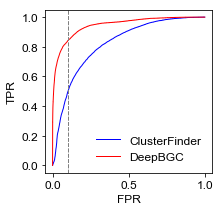

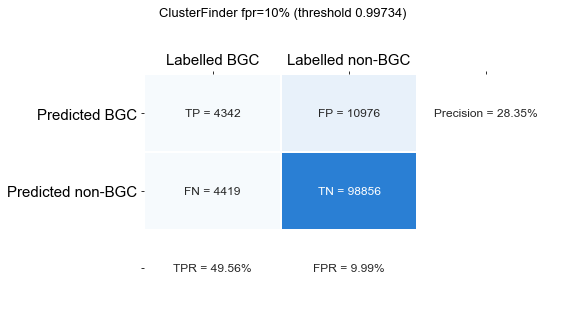

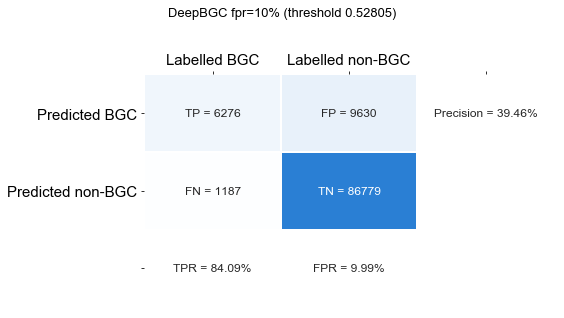

In [50]:
fpr_cands, fpr_figures = load_cands(target_fpr=0.1)
fpr_cands.head()

In [51]:
fpr_conf1, fpr_conf2, fpr_roc = fpr_figures
#fpr_roc.savefig('../data/figures/paper/supplementary/S5a.pdf', bbox_inches='tight')

CM000950.1 of length 8019787
DS999641.1 of length 8221230
DS999642.1 of length 230684
DS999645.1 of length 6813747
GG657738.1 of length 6756167
GG657746.1 of length 8224207
GG657747.1 of length 321694
KK037166.1 of length 11584019
KK037233.1 of length 6703188


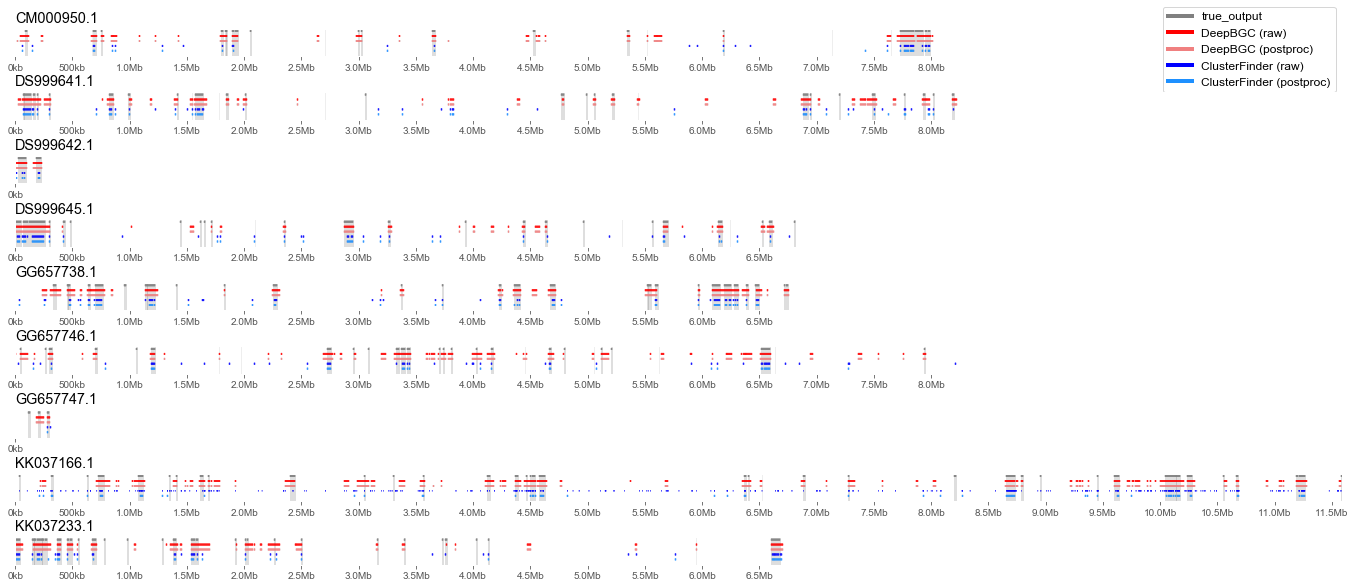

In [52]:
fig = candidate_regions(pd.concat([true_output, fpr_cands[::-1]]), colors=COLORS, xstep=500000);
fig.set_figwidth(20)
fig.set_figheight(8)
fig.axes[0].legend(loc='upper right', bbox_to_anchor=(1, 2))
#fig.savefig('../data/figures/paper/supplementary/S6.pdf', bbox_inches='tight')

In [53]:
fpr_coverage = get_per_model_coverage(fpr_cands)
fpr_coverage.head()

,coverage,any_exact,max_covered,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,0.000000,False,0.0,CM000950.1,CM000950.1(82098-106091),be3b3dff39637b59102a047202a38aca,1.0,23994,82098,106091,21,72,21,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF00106;PF01370;PF0271...,ClusterFinder (postproc)
1,0.000000,False,0.0,CM000950.1,CM000950.1(669566-674656),82d24a404aff0bde250ca3a7d4077044,1.0,5091,669566,674656,1,9,4,EDY61704.1;EDY61705.1;EDY61706.1;EDY61707.1,PF02624;PF01674;PF04055;PF01246;PF06969;PF0088...,ClusterFinder (postproc)
2,0.620065,False,1.0,CM000950.1,CM000950.1(679640-707907),03822cc19bf0288d1f2b2a332f87f9ba,1.0,28268,679640,707907,2,62,11,EDY61715.1;EDY61716.1;EDY61717.1;EDY61718.2;ED...,PF01648;PF11241;PF07969;PF01979;PF13304;PF1323...,ClusterFinder (postproc)
3,0.342483,False,1.0,CM000950.1,CM000950.1(750566-761021),5bd23f8bcbb8964cf99b430503922b09,1.0,10456,750566,761021,5,25,8,EDY61768.1;EDY61769.1;EDY61770.1;EDY61771.1;ED...,PF01381;PF13443;PF13413;PF13560;PF12844;PF0788...,ClusterFinder (postproc)
4,0.377423,False,1.0,CM000950.1,CM000950.1(1793677-1812864),b728e42113384cd400e752431291daef,1.0,19188,1793677,1812864,19,62,15,EFH30868.1;EFH30869.1;EFH30870.1;EFH30871.1;EF...,PF13692;PF00534;PF16861;PF00814;PF02543;PF0107...,ClusterFinder (postproc)


## Candidate stats

In [54]:
fpr_bins = get_candidate_bins(fpr_cands)
fpr_bins.head()

,false positives,oversized,exact match,75-99% coverage,50-75% coverage,25-50% coverage,1-25% coverage
model,,,,,,,
ClusterFinder (postproc),163,2,2,18,40,53,77
ClusterFinder (raw),846,2,1,15,27,68,186
DeepBGC (postproc),125,101,1,8,6,5,3
DeepBGC (raw),262,101,2,8,7,4,15


In [55]:
def plot_stacked(df, ax=None, **kwargs):
    df[::-1].plot.barh(stacked=True, ax=ax, **kwargs)
    sum_per_row = df.sum(axis=1)
    top = sum_per_row.max()
    ax.set_xlim([0, top*1.2])        

def plot_candidate_bins(bins, ax=None, figsize=(9,3)):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=figsize, gridspec_kw = {'width_ratios':[1.5, 1]})
    neg_bins = bins[['false positives']]
    color = '#ee5555'
    #color = '#444444'
    plot_stacked(neg_bins, ax=ax[1], color=color, legend=False)
    ax[1].set_xlabel('# False positive candidates')
    handles, labels = ax[1].get_legend_handles_labels()
    color = ['#cccc00', '#007700', '#44bb44', '#66cc66', '#88dd88','#aaeeaa']
    #color = ['#777777', '#444444', '#999999', '#b0b0b0', '#c0c0c0', '#d0d0d0']
    other_bins = bins.drop('false positives', axis=1)
    plot_stacked(other_bins, ax=ax[0], color=color, legend=False)
    #other_bins.T[::-1].plot(ax=ax[0], marker='o', rot=90)
    #other_bins.T[::-1].plot.bar(ax=ax[0], rot=90)
    #ax[0].set_xlabel('# True positive candidates')
    #second_handles, second_labels = ax[0].get_legend_handles_labels()
    #fig.legend(handles+second_handles, labels+second_labels, bbox_to_anchor=(0.99,0.9), loc='upper left')

    plt.tight_layout()

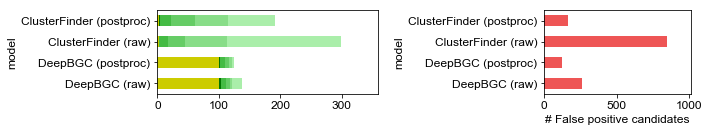

In [56]:
plot_candidate_bins(fpr_bins, figsize=(10, 2))

# TPR 80% - Horizontal cut of ROC curve

----------------------------------------
ClusterFinder: 0.820 AUC
ClusterFinder tpr=80% (threshold 0.85645)
                   Labelled BGC  Labelled non-BGC   
Predicted BGC              7008             34529  0
Predicted non-BGC          1753             75303  0
                              0                 0  0
----------------------------------------
DeepBGC: 0.945 AUC
DeepBGC tpr=80% (threshold 0.68252)
                   Labelled BGC  Labelled non-BGC   
Predicted BGC              5969              6468  0
Predicted non-BGC          1494             89941  0
                              0                 0  0
----------------------------------------
Number of candidates:
model
ClusterFinder (postproc)    1234
ClusterFinder (raw)         2697
DeepBGC (postproc)           191
DeepBGC (raw)                272
dtype: int64


,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,CM000950.1,CM000950.1(13-5029),6723119b37dcfdbe9e6c50be20291492,0.947474,5017,13,5029,5,21,4,EDY62461.1;EDY62463.1;EDY62465.1;EDY62466.1,PF13515;PF05175;PF01728;PF13489;PF13659;PF1284...,ClusterFinder (postproc)
1,CM000950.1,CM000950.1(19337-21404),4ecdb188d39b00556917ce9da2d87a3b,0.929591,2068,19337,21404,2,7,2,EDY62483.1;EDY62484.2,PF10604;PF01266;PF00890;PF01946;PF02737;PF1283...,ClusterFinder (postproc)
3,CM000950.1,CM000950.1(60496-65123),07ed72b783ac8688ff83ef101209c7fc,0.993542,4628,60496,65123,5,16,3,EDY62519.1;EDY62520.1;EDY62522.1,PF13460;PF13561;PF01370;PF00106;PF08659;PF1356...,ClusterFinder (postproc)
4,CM000950.1,CM000950.1(82098-89907),e232b204bb30daf96f93b8ec2b19658b,0.985359,7810,82098,89907,13,26,8,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF13561;PF01370;PF0010...,ClusterFinder (postproc)
5,CM000950.1,CM000950.1(109138-126144),4cf84db95d0b6a49697a7b1fa1aa5e6f,0.965397,17007,109138,126144,6,56,12,EDY62559.1;EDY62561.2;EDY62562.1;EDY62563.1;ED...,PF07332;PF03848;PF05401;PF13847;PF13489;PF0824...,ClusterFinder (postproc)


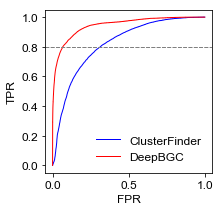

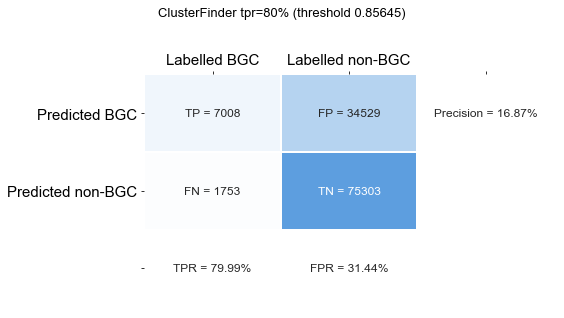

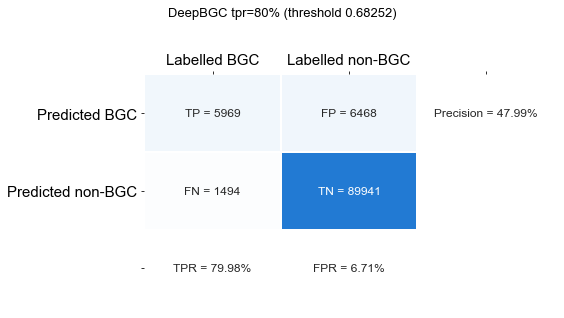

In [57]:
tpr_cands, tpr_figures = load_cands(target_tpr=0.8)
tpr_cands.head()

In [58]:
tpr_conf1, tpr_conf2, tpr_roc = tpr_figures
#tpr_roc.savefig('../data/figures/paper/supplementary/S5b.pdf', bbox_inches='tight')

CM000950.1 of length 8118681
DS999641.1 of length 8213127
DS999642.1 of length 230684
DS999645.1 of length 6813747
GG657738.1 of length 6795853
GG657746.1 of length 8469306
GG657747.1 of length 327000
KK037166.1 of length 11584019
KK037233.1 of length 6703188


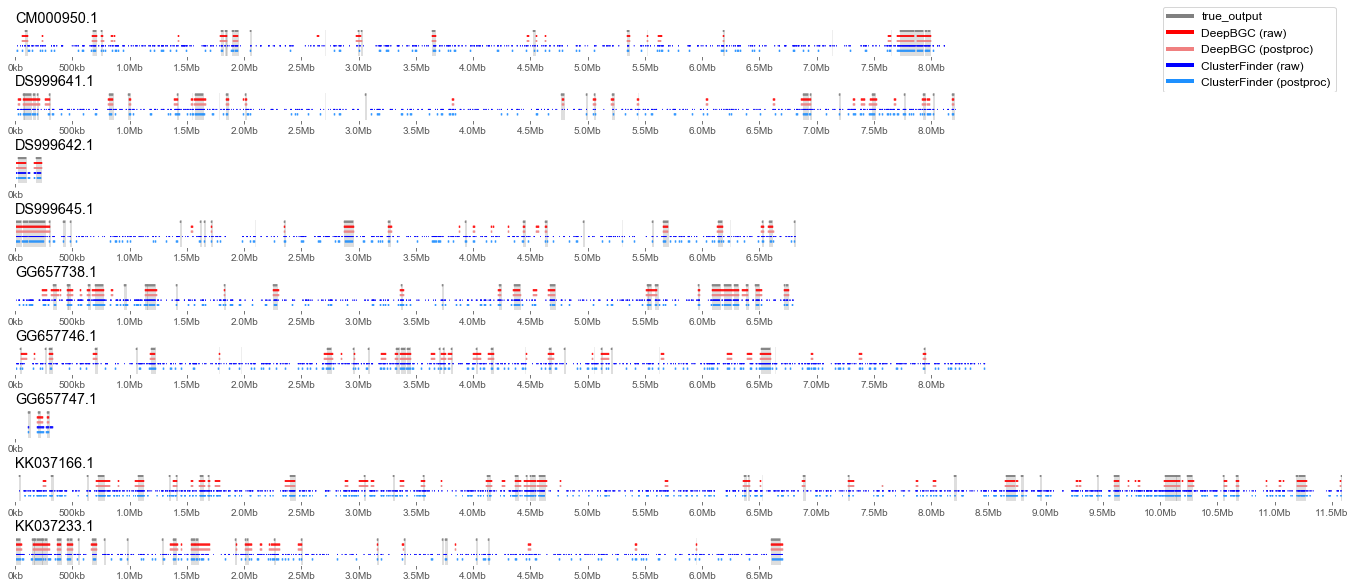

In [59]:
fig = candidate_regions(pd.concat([true_output, tpr_cands[::-1]]), colors=COLORS, xstep=500000);
fig.set_figwidth(20)
fig.set_figheight(8)
fig.axes[0].legend(loc='upper right', bbox_to_anchor=(1, 2))
#fig.savefig('../data/figures/paper/supplementary/S7.pdf', bbox_inches='tight')

In [60]:
tpr_coverage = get_per_model_coverage(tpr_cands)
tpr_coverage.head()

,coverage,any_exact,max_covered,contig_id,candidate_id,candidate_hash,avg_prediction,nucl_length,nucl_start,nucl_end,num_bio_domains,num_all_domains,num_proteins,protein_ids,pfam_ids,model
0,0.325498,False,1.000000,CM000950.1,CM000950.1(82098-106091),be3b3dff39637b59102a047202a38aca,1.0,23994,82098,106091,21,72,21,EDY62535.1;EDY62536.1;EDY62537.1;EDY62538.1;ED...,PF01636;PF02958;PF07914;PF00106;PF01370;PF0271...,ClusterFinder (postproc)
1,0.904145,False,0.308367,CM000950.1,CM000950.1(669566-674656),82d24a404aff0bde250ca3a7d4077044,1.0,5091,669566,674656,1,9,4,EDY61704.1;EDY61705.1;EDY61706.1;EDY61707.1,PF02624;PF01674;PF04055;PF01246;PF06969;PF0088...,ClusterFinder (postproc)
2,0.821388,False,1.000000,CM000950.1,CM000950.1(679640-707907),03822cc19bf0288d1f2b2a332f87f9ba,1.0,28268,679640,707907,2,62,11,EDY61715.1;EDY61716.1;EDY61717.1;EDY61718.2;ED...,PF01648;PF11241;PF07969;PF01979;PF13304;PF1323...,ClusterFinder (postproc)
3,0.936018,False,1.000000,CM000950.1,CM000950.1(750566-761021),5bd23f8bcbb8964cf99b430503922b09,1.0,10456,750566,761021,5,25,8,EDY61768.1;EDY61769.1;EDY61770.1;EDY61771.1;ED...,PF01381;PF13443;PF13413;PF13560;PF12844;PF0788...,ClusterFinder (postproc)
4,0.720555,False,1.000000,CM000950.1,CM000950.1(1793677-1812864),b728e42113384cd400e752431291daef,1.0,19188,1793677,1812864,19,62,15,EFH30868.1;EFH30869.1;EFH30870.1;EFH30871.1;EF...,PF13692;PF00534;PF16861;PF00814;PF02543;PF0107...,ClusterFinder (postproc)


## Candidate stats

In [61]:
tpr_bins = get_candidate_bins(tpr_cands)
tpr_bins.head()

,false positives,oversized,exact match,75-99% coverage,50-75% coverage,25-50% coverage,1-25% coverage
model,,,,,,,
ClusterFinder (postproc),1030,46,8,53,44,29,24
ClusterFinder (raw),2456,37,11,50,48,38,57
DeepBGC (postproc),74,83,1,20,7,4,2
DeepBGC (raw),151,83,1,21,7,4,5


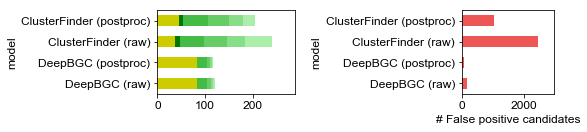

In [62]:
plot_candidate_bins(tpr_bins, figsize=(8, 2))

# Final plots

In [63]:
def binary_venn_bins(a, b):
    both = a & b
    only_a = a & ~b
    only_b = b & ~a
    return only_a.values, both.values, only_b.values

def plot_venn(only_a, both, only_b, a_label, b_label, **kwargs):
    #print('Only {}: {}\nBoth: {}\nOnly {}: {}'.format(a_label, sum(only_a), sum(both), b_label, sum(only_b)))
    return venn2(subsets=(sum(only_a), sum(only_b), sum(both)), **kwargs)
    
def plot_condition_venn(a, b, label_a, label_b, coverage_lambda, **kwargs):
    only_a, both, only_b = binary_venn_bins(coverage_lambda(a), coverage_lambda(b))
    return plot_venn(only_a, both, only_b, label_a, label_b, **kwargs)

def plot_comparison_venn(coverage, postproc='raw', threshold=0, **kwargs):
    return plot_condition_venn(
        coverage[coverage['model'] == 'DeepBGC ({})'.format(postproc)]['coverage'], 
        coverage[coverage['model'] == 'ClusterFinder ({})'.format(postproc)]['coverage'],
        'DeepBGC',
        'ClusterFinder',
        lambda c: c > threshold,
        set_labels=('',''),
        set_colors=(COLORS['DeepBGC ({})'.format(postproc)], COLORS['ClusterFinder ({})'.format(postproc)]),
        **kwargs
    )

In [64]:
def bar_with_number(ax, i, val, val_str, xstep, ystep, **kwargs):
    ax.barh(i, val, **kwargs)
    ax.text(val+xstep, i-ystep, val_str, color='grey')
    
def plot_cand_summary(bins, coverage, figsize=(10, 2), cov_lim=None, cov_step=100, prec_lim=None, prec_step=0.1, fp_lim=None, fp_step=100, tp_lim=None, tp_step=100):
    dist = []
    thresholds = np.arange(0, 1, 0.001)
    num_total = coverage.groupby('model').size()
    for threshold in thresholds:
        num_over_threshold = coverage[coverage['coverage'] > threshold].groupby('model').size()
        dist.append(num_over_threshold)
    dist = pd.DataFrame(dist, index=thresholds)

    hits_total = bins.sum(axis=1)
    hits_correct = hits_total - bins['false positives']
    precision = hits_correct / hits_total
    
    fig, axes = plt.subplots(1, 5, figsize=figsize, gridspec_kw={'width_ratios':[1,1,1,2,2]})
        
    for i, threshold in enumerate([0, 0.5, 0.99999]):
        plot_comparison_venn(coverage, 'raw', threshold, ax=axes[i])
    
    for i, name in enumerate(bins.index):
        color = COLORS[name]
        is_postproc = 'postproc' in name
        linestyle = '--' if is_postproc else '-'
        coverage_ax = axes[3]
        coverage_ax.plot(dist[name], color=color, linestyle=linestyle, lw=1)
        
        #tp_value = hits_correct.loc[name]
        #tp_ax = axes[1][0]
        #bar_with_number(tp_ax, i, tp_value, str(tp_value), xstep=20, ystep=0.2, color=color, tick_label='')
        
        #fp_value = bins.loc[name]['false positives']
        #fp_ax = axes[1][1]
        #bar_with_number(fp_ax, i, fp_value, str(fp_value), xstep=20, ystep=0.2, color=color, tick_label='')
        
        prec_value = precision.loc[name]
        prec_ax = axes[4]
        bar_with_number(prec_ax, i, prec_value, '{:.2f}'.format(prec_value), xstep=0.015, ystep=0.25, color=color, tick_label='')
        
    #plt.tight_layout(pad=1.3)
    if cov_lim:
        coverage_ax.set_yticks(list(range(0, cov_lim, cov_step)))
        coverage_ax.set_ylim([0, cov_lim])
    coverage_ax.set_xlim([-0.01,1.01])
    coverage_ax.set_xticklabels(['>{:.0f}%'.format(x*100) for x in coverage_ax.get_xticks()]);
    coverage_ax.set_ylabel('# BGCs')
    coverage_ax.set_xlabel('BGC Coverage')
    #if tp_lim:
    #    tp_ax.set_xticks(list(range(0, tp_lim, tp_step)))
    #    tp_ax.set_xlim([0, tp_lim])
    #tp_ax.set_xlabel('True positive candidates')
    # 
    #if fp_lim:
    #    fp_ax.set_xticks(list(range(0, fp_lim, fp_step)))
    #    fp_ax.set_xlim([0, fp_lim])
    #fp_ax.set_xlabel('False positive candidates')
    
    prec_ax.set_xlabel('Candidate-wise precision')
    if prec_lim:
        prec_ax.set_xticks(list(np.arange(0, prec_lim, prec_step)))
        prec_ax.set_xlim([0, prec_lim])
    prec_ax.set_xticklabels(['{:.1f}'.format(x) for x in prec_ax.get_xticks()]);
    plt.tight_layout()
    return fig

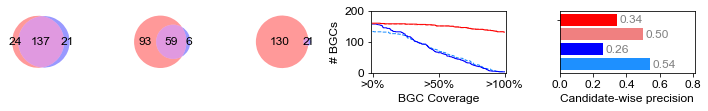

In [65]:
fig = plot_cand_summary(fpr_bins, fpr_coverage, figsize=(10, 1.7), cov_lim=201, prec_lim=0.81, prec_step=0.2)
#fig.savefig('../data/figures/paper/main/4a.pdf', bbox_inches='tight')

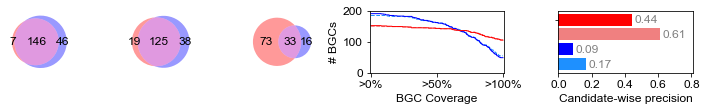

In [66]:
fig = plot_cand_summary(tpr_bins, tpr_coverage, figsize=(10, 1.7), cov_lim=201, prec_lim=0.81, prec_step=0.2)
#fig.savefig('../data/figures/paper/main/4b.pdf', bbox_inches='tight')